# Aula 3 Ex2 - Rede Neural Convolucional: Classificar Fashion MNIST

In [96]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from keras import optimizers
import numpy as np
import sys
import os

In [97]:
%matplotlib inline

In [98]:
plt.style.use("ggplot")

# 1. Carregar MNIST data

Nesse caso, selecionamos as 6000 primeiras imagens do dataset de treino.

In [99]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [100]:
print("Shape X treino:", X_train.shape)

('Shape X treino:', (60000, 28, 28))


In [101]:
print("Shape Y treino:", Y_train.shape)

('Shape Y treino:', (60000,))


In [102]:
print("Shape X treino:", X_test.shape)

('Shape X treino:', (10000, 28, 28))


In [103]:
print("Shape Y teste:", Y_test.shape)

('Shape Y teste:', (10000,))


In [104]:
dim1, dim2 = X_train.shape[1], X_train.shape[2] # 28, 28

In [105]:
n_class = 10

## 1.1 Visualizar as imagens do Fashion MNIST

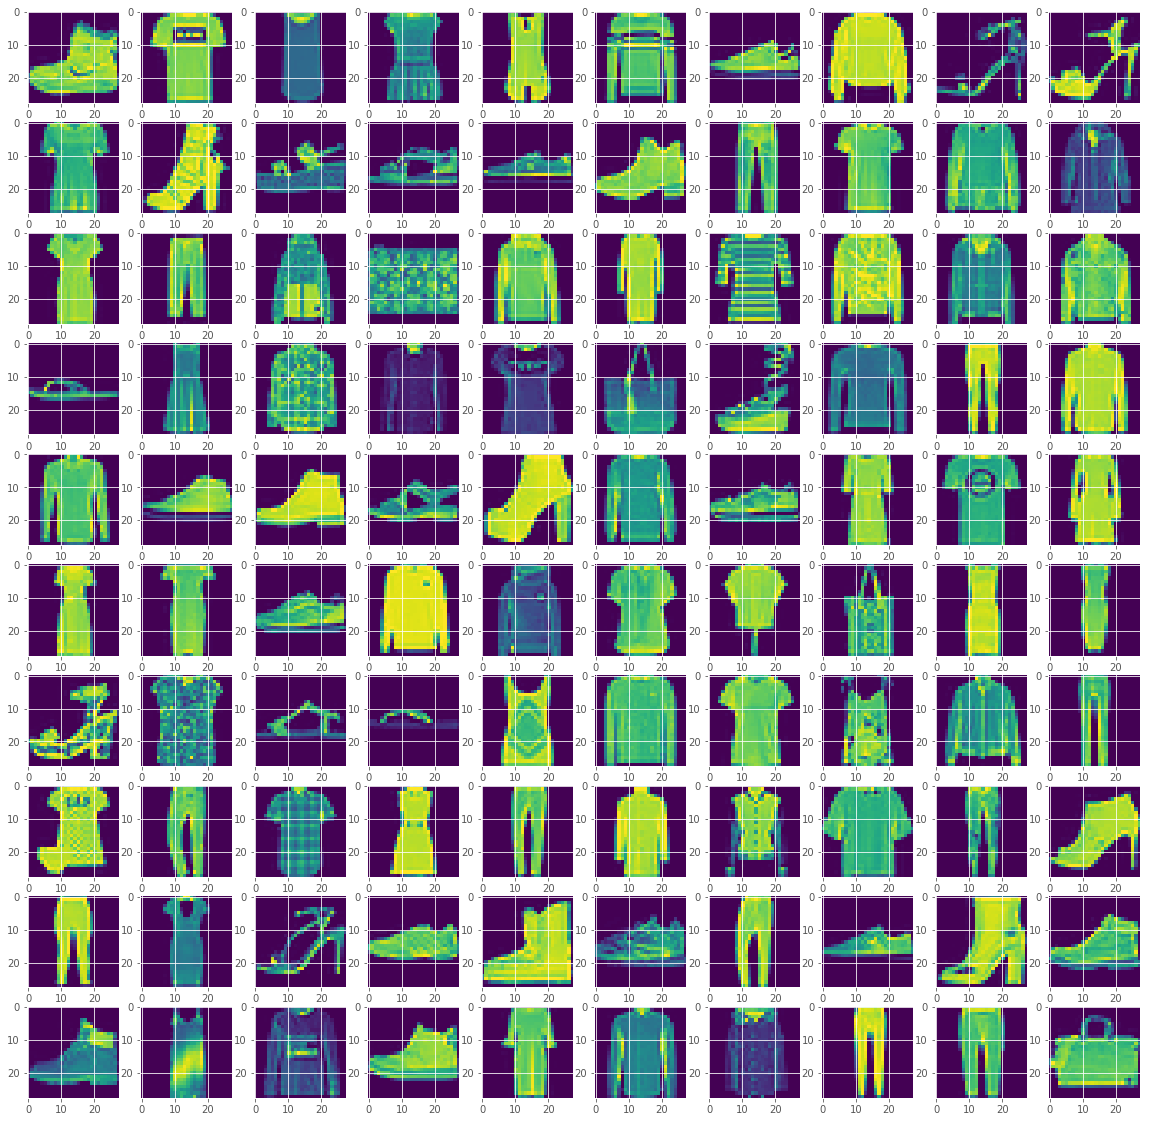

In [106]:
fig = plt.figure(figsize=(20,20))

columns=10
rows=10

img_idx = 0

for i in range(1, columns*rows+1):
    
    img = X_train[img_idx]
    
    fig.add_subplot(rows, columns, i)

    plt.imshow(img)
        
    img_idx = img_idx + 1

# 2. Reshape dos dados: formato X e Y para treino

**Se fossemos utilizar algum algoritmo que espera tabela (MLP, SVM, kNN, Random Forest), utilizariamos o método abaixo:**
Nossa base de dados veio asssm: 60000 quadradinhos de 28x28 (imagens). Queremos transformar isso para um formato de "tabela" em que cada pixel da imagem será uma feature do modelo. Então, precisamos aplicar uma transformação que pegue os pixels de uma imagem e transforme isso em 28x28 features de uma observação.

Como a CNN faz uso da espacialidade, temos que fornecer estes dados em outro formato.

In [107]:
#X_train = X_train.reshape((X_train.shape[0], -1))

In [108]:
#X_test = X_test.reshape((X_test.shape[0], -1))

Observamos então que nosso dado de treino é agora uma tabela com 60000 observações e 784 features.

In [109]:
print("Shape X treino:", X_train.shape)

('Shape X treino:', (60000, 28, 28))


In [110]:
Y_train = keras.utils.to_categorical(Y_train, n_class)
Y_test = keras.utils.to_categorical(Y_test, n_class)

In [111]:
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)

# 3. Normalizar os dados da imagem usando método MinMax 

Isso ajuda nosso modelo a convergir mais rápido e evitar problemas com vanishing ou exploding gradient.

In [112]:
X_train = X_train.astype('float64') / 255.0

In [113]:
X_test = X_test.astype('float64') / 255.0

# 4. Definindo arquitetura da Rede Neural Convolucional

In [114]:
model = Sequential()

## 4.1 Etapa de Convolução: extração de features

Na etapa de convolução aplica-se um filtro linear em que cada pixel da janela móvel sobre a imagem de treino é multiplicado pelos pesos do kernel. A soma dos produtos da janela móvel com o kernel é atribuída a outra imagem. 

<img src="teste.png">
    

In [115]:
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(dim1, dim2, 1) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

## 4.2 Etapa Densa: rede neural convencional

Nessa etapa teremos uma Rede Neural do tipo MLP que classificará então as imagens obtidas após a etapa de extração de features na convolução. 

In [116]:
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(n_class, activation='softmax'))

# 5. Compilar e Fitar

## 5.1 Otimizador

Utilizaremos o Adam

In [117]:
opt=optimizers.Adam()

## 5.2 Compilar o modelo

In [118]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## 5.3 Fit do modelo

In [119]:
model.fit(X_train, Y_train, batch_size=50, epochs=60, verbose=2)

Epoch 1/60
 - 35s - loss: 0.4645 - acc: 0.8298
Epoch 2/60
 - 39s - loss: 0.2980 - acc: 0.8908
Epoch 3/60
 - 34s - loss: 0.2560 - acc: 0.9052
Epoch 4/60
 - 34s - loss: 0.2267 - acc: 0.9150
Epoch 5/60
 - 33s - loss: 0.2048 - acc: 0.9228
Epoch 6/60
 - 33s - loss: 0.1823 - acc: 0.9312
Epoch 7/60
 - 33s - loss: 0.1641 - acc: 0.9381
Epoch 8/60
 - 33s - loss: 0.1463 - acc: 0.9446
Epoch 9/60
 - 33s - loss: 0.1311 - acc: 0.9503
Epoch 10/60
 - 34s - loss: 0.1197 - acc: 0.9542
Epoch 11/60
 - 36s - loss: 0.1052 - acc: 0.9601
Epoch 12/60
 - 37s - loss: 0.0951 - acc: 0.9637
Epoch 13/60
 - 35s - loss: 0.0878 - acc: 0.9666
Epoch 14/60
 - 34s - loss: 0.0830 - acc: 0.9681
Epoch 15/60
 - 34s - loss: 0.0727 - acc: 0.9723
Epoch 16/60
 - 36s - loss: 0.0738 - acc: 0.9727
Epoch 17/60
 - 37s - loss: 0.0612 - acc: 0.9772
Epoch 18/60
 - 39s - loss: 0.0593 - acc: 0.9781
Epoch 19/60
 - 38s - loss: 0.0552 - acc: 0.9791
Epoch 20/60
 - 36s - loss: 0.0514 - acc: 0.9801
Epoch 21/60
 - 37s - loss: 0.0544 - acc: 0.9800
E

# 6. Avaliando o modelo

Utilizando acurácia
 

In [120]:
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test accuracy:', score[1])

('Test accuracy:', 0.9127)
